In [64]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
import scipy as scp
from scipy.stats import variation
#import scranPY

# Load and prepare the data

In [2]:
# Load the bursting moddel results - biallelic. Add the gene information (derived from the gff file)
GTM_total = pd.read_csv("./total.csv")
gene_info=pd.read_csv('./genes_and_PTUs.csv')


gene_info.index = ['_'.join(x.split(':')) for x in gene_info['gene_name']]
GTM_total.index =  [x.lstrip('total_') for x in GTM_total['Unnamed: 0']]
del GTM_total['Unnamed: 0'], gene_info['gene_name']

gene_info['chromosome'] = gene_info['0']
gene_info['start'] = gene_info['3']
gene_info['end'] = gene_info['4']
gene_info['strand'] = gene_info['6']
gene_info['all_gene_info'] = gene_info['8']
gene_info['length_gene'] = gene_info['4'] - gene_info['3']
del gene_info['Unnamed: 0'], gene_info['0'], gene_info['3'], gene_info['4']
del gene_info['6'], gene_info['7'], gene_info['8']

# add extra PTU information. 
GTM_total = GTM_total.join(gene_info)
GTM_total

#################################

ercc_genes = []
# label ERCC genes
for gene in GTM_total.index.tolist():
    if "ERCC" in gene: 
        ercc_genes.append(gene)
    else:
        ercc_genes.append('tryp_gene')
GTM_total['ERCC']= ercc_genes
#pd.crosstab(GTM_total['ERCC'], GTM_total['ERCC'])

In [3]:
# Add the processing rate
processing_rate_file = './TTseq2_FeatureCounts_to_RPKM_core_genes_length_processing_scores_for_Anna_Danese.csv'
processing = pd.read_csv(processing_rate_file, index_col=0)

# group genes above and below the median 
label =[]
median_value = np.median(processing['120secav/30secav'].tolist())
for value in processing['120secav/30secav'].tolist():
    if value < median_value:
        label.append('above')
    else:
        label.append('below')
processing['120secav/30secav_median_group'] = label

# group genes above and below the median 
label =[]
median_value = np.median(processing['120secav/60secav'].tolist())
for value in processing['120secav/60secav'].tolist():
    if value < median_value:
        label.append('above')
    else:
        label.append('below')
processing['120secav/60secav_median_group'] = label


df = GTM_total.join(processing)
df['Length_from_processing_rate_file'] = df['Length']
del df['Length']

In [4]:
# Add the half life
half_life_file = "./HLs_tryps_2023_Haanstra_Danese.csv"
half_life = pd.read_csv(half_life_file, index_col=0)

# group genes above and below the median 
label =[]
median_value = np.median(half_life['Half-life'].tolist())
for value in half_life['Half-life'].tolist():
    if value < median_value:
        label.append('below')
    else:
        label.append('above')
half_life['Half-life_median_group'] = label


# group genes above and below the median 
label =[]
median_value = np.median(half_life['Synthesis'].tolist())
for value in half_life['Synthesis'].tolist():
    if value < median_value:
        label.append('below')
    else:
        label.append('above')
half_life['Synthesis_median_group'] = label

df = df.join(half_life)
df

kon        ron      koff       roff         mu  delta  \
Tb427_090043800   1.095098   0.172774  2.634273   0.603577   1.196558    1.0   
Tb427_110047500   1.651448   0.292978  5.096461  11.082273   0.676812    1.0   
Tb427_110072700   0.736716   0.409819  3.074910   5.173446   0.356244    1.0   
Tb427_110027100   2.830921   7.328807  3.758352   0.858218   0.245581    1.0   
Tb427_040017000   4.341131   1.022050  2.847181   3.000130   2.453351    1.0   
...                    ...        ...       ...        ...        ...    ...   
Tb427_070071500   2.731274   0.542185  2.228025   4.823811   2.106353    1.0   
Tb427_100167700   1.332222   0.227245  4.672450   6.432923   2.086632    1.0   
Tb427_080021500   5.460650   2.611379  2.704088  25.536781  54.056759    1.0   
Tb427_070044400   3.799842   0.761341  3.607011   0.703032   3.063453    1.0   
Tb427_040056600  11.000465  17.905841  4.227859   0.588928   0.039917    1.0   

                     dist   tau_off    tau_on        bf  ...  \
Tb427_090043800  0.439260  6.338333  4.364434  0.093434  ...   
Tb427_110047500  0.107134  5.636772  0.459875  0.164025  ...   
Tb427_110072700  0.241954  1.797662  0.594364  0.418056  ...   
Tb427_110027100  0.458285  0.386273  4.379249  0.209841  ...   
Tb427_040017000  0.265375  4.247474  0.949019  0.192437  ...   
...                   ...       ...       ...       ...  ...   
Tb427_070071500  0.306832  5.037529  0.461881  0.181838  ...   
Tb427_100167700  0.271849  5.862500  0.726334  0.151772  ...   
Tb427_080021500  0.154704  2.091098  0.105890  0.455169  ...   
Tb427_070044400  0.451871  4.990984  5.130647  0.098798  ...   
Tb427_040056600  0.154777  0.614351  7.178908  0.128316  ...   

                 Length_from_processing_rate_file  Category         TPM  \
Tb427_090043800                            2817.0   TriTryp   45.894341   
Tb427_110047500                            3729.0   TriTryp   51.575408   
Tb427_110072700                            2300.0   TriTryp   35.615422   
Tb427_110027100                            1464.0   TriTryp   23.124663   
Tb427_040017000                             519.0       NaN         NaN   
...                                           ...       ...         ...   
Tb427_070071500                               NaN   TriTryp    8.238602   
Tb427_100167700                             775.0       NaN         NaN   
Tb427_080021500                            3419.0   TriTryp  435.137657   
Tb427_070044400                             741.0   TriTryp   61.900654   
Tb427_040056600                             329.0       NaN         NaN   

                   Count  4sU effect  Length   Synthesis  Half-life  \
Tb427_090043800   810.50          no  2817.0  203.493579   9.950068   
Tb427_110047500  1180.90          no  3729.0  229.659490  10.551335   
Tb427_110072700   515.25          no  2300.0  137.414086  11.494787   
Tb427_110027100   218.75          no  1464.0  118.106049   9.360705   
Tb427_040017000      NaN         NaN     NaN         NaN        NaN   
...                  ...         ...     ...         ...        ...   
Tb427_070071500   149.30          no  2831.0   49.052303   7.029624   
Tb427_100167700      NaN         NaN     NaN         NaN        NaN   
Tb427_080021500  9213.20          no  3419.0  302.589439  60.738925   
Tb427_070044400   292.10          no   741.0  177.065094  14.906439   
Tb427_040056600      NaN         NaN     NaN         NaN        NaN   

                Half-life_median_group Synthesis_median_group  
Tb427_090043800                  below                  above  
Tb427_110047500                  below                  above  
Tb427_110072700                  above                  below  
Tb427_110027100                  below                  below  
Tb427_040017000                    NaN                    NaN  
...                                ...                    ...  
Tb427_070071500                  below                  below  
Tb427_100167700            

In [5]:
df['Half-life_log'] = np.log10(df['Half-life'].tolist())
df['Synthesis_log'] = np.log10(df['Synthesis'].tolist())
df['120secav/30secav_log'] = np.log10(df['120secav/30secav'].tolist())
df['120secav/60secav_log'] = np.log10(df['120secav/60secav'].tolist())

# Splitting the genes into 4 categories based on halflife and processing rate

WARNING : not all the genes present in dataframe have a Processing or Half life value
But I grouped the genes based on the median before merging the dataframes. so the genes are assigned to the same group as Vanessa. But the number of genes will be different

In [6]:
pd.crosstab(df['Synthesis_median_group'], df['Half-life_median_group'], margins=True)


Half-life_median_group  above  below   All
Synthesis_median_group                    
above                    1831   1346  3177
below                    1310   1689  2999
All                      3141   3035  6176

In [7]:
#pd.crosstab(df['120secav/60secav_median_group'], df['Half-life_median_group'])


In [8]:
#pd.crosstab(df['120secav/30secav_median_group'], df['Half-life_median_group'])


- group 1 --> 1/2 life above, Synth rate above
- group 2 --> 1/2 life above, Synth rate below
- group 3 --> 1/2 life below, Synth rate above
- group 4 --> 1/2 life below, Synth rate below

In [9]:
label = []
half_life_values = df['Half-life_median_group'].tolist()
proc_values = df['Synthesis_median_group'].tolist()
index = 0
for line in half_life_values:
    if (line == 'above') & (proc_values[index] == 'above'):
        label.append('group 1')
    elif (line == 'above') & (proc_values[index] == 'below'):
        label.append('group 2')
    elif (line == 'below') & (proc_values[index] == 'above'):
        label.append('group 3')
    elif (line == 'below') & (proc_values[index] == 'below'):
        label.append('group 4')
    else:
        label.append(np.nan)
    index += 1
df['group_per_median'] = label

In [10]:
pd.crosstab(df['group_per_median'], df['group_per_median'])

group_per_median  group 1  group 2  group 3  group 4
group_per_median                                    
group 1              1831        0        0        0
group 2                 0     1310        0        0
group 3                 0        0     1346        0
group 4                 0        0        0     1689

In [11]:
# save the data into a single csv file
df.to_csv('trypanosoma_GTM_halflife_processing_rate.csv')

# Load the scRNA-seq data 

In [12]:
adata = ad.read('trypanosoma_filtered.h5ad')
adata.layers['abs_raw_counts'] = adata.X

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


### split the ERCC from the real count

In [13]:
label = []
for gene in adata.var_names.tolist():
    if "__" in gene:
        label.append('not_a_gene')
    elif "ERCC" in gene:
        label.append("ERCC")
    else:
        label.append('Trypanosoma gene')
adata.var['gene_type'] = label

In [14]:
adata = adata[:,adata.var['gene_type']=='Trypanosoma gene'].copy()
adata

AnnData object with n_obs × n_vars = 384 × 7173
    obs: 'n_counts'
    var: 'n_cells', 'gene_type'
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'abs_raw_counts'
    obsp: 'connectivities', 'distances'

In [15]:
sc.pp.filter_cells(adata, min_genes=10)
sc.pp.filter_genes(adata, min_cells=2)
adata

AnnData object with n_obs × n_vars = 384 × 7173
    obs: 'n_counts', 'n_genes'
    var: 'n_cells', 'gene_type'
    uns: 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'abs_raw_counts'
    obsp: 'connectivities', 'distances'

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

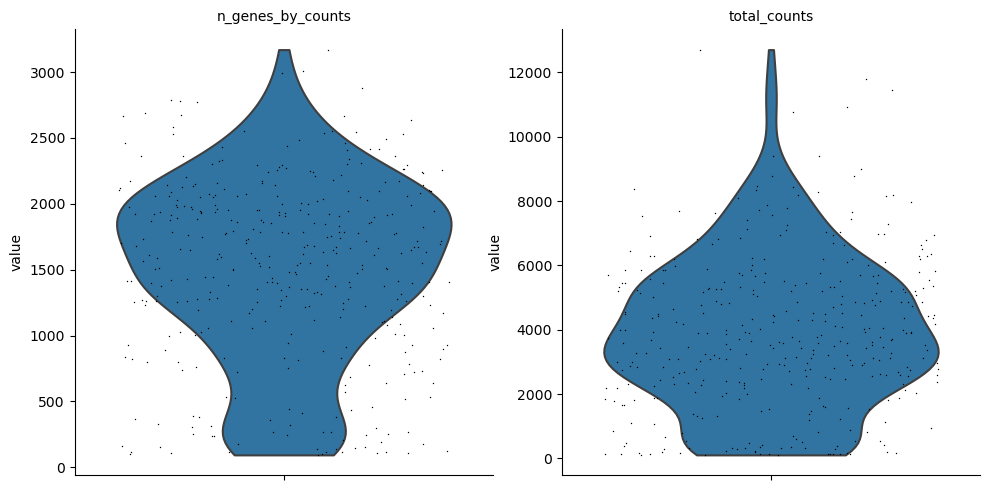

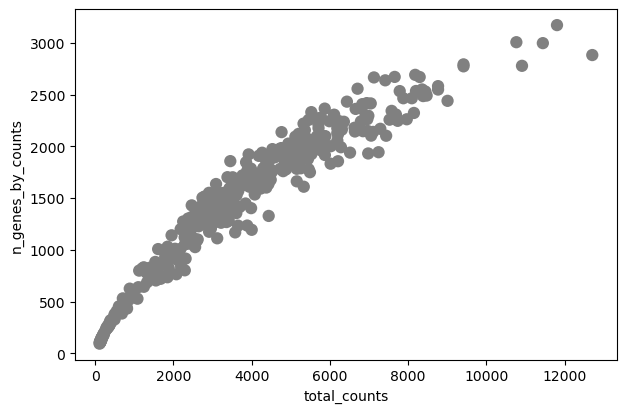

In [16]:
sc.pp.calculate_qc_metrics(adata,log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

### scran normalisation

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


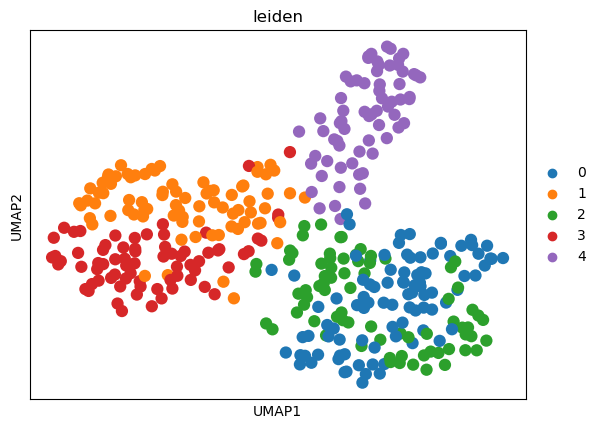

In [17]:
adata.layers['raw_count']=adata.X
sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color='leiden')

In [18]:
#adata_ercc = adata[:,adata.var['gene_type']=='ERCC'].copy()
#adata_ercc

In [19]:
#adata_ercc.X = adata_ercc.layers['raw_count']

In [20]:
#siz_facotrs = scranPY.compute_sum_factors(adata=adata_ercc, clusters='leiden', parallelize=True, algorithm='CVXPY', sizes=np.arange(21, 102, 5), 
#   max_size=3000, min_mean=None, plotting=True, lower_bound=0.1, normalize_counts=False, log1p=False, layer='scranPY', 
#   save_plots_dir=None, stopwatch=True)

In [21]:
# Visualize the estimated size factors
#total.obs['size_factors'] = siz_facotrs

#sc.pl.scatter(adata, 'size_factors', 'n_counts')
#sc.pl.scatter(adata, 'size_factors', 'n_genes')

#sns.distplot(siz_facotrs, bins=50, kde=False)
#plt.show()

In [22]:
#Keep the count data in a counts layer
#adata.layers["counts"] = adata.X.copy()

In [23]:
#adata.X = adata.layers['raw_count']

In [24]:
#Normalize adata 
#adata.X /= adata.obs['size_factors'].values[:,None]
#sc.pp.log1p(adata)

In [25]:
# Store the full data set in 'raw' as log-normalised data for statistical testing
#adata.raw = adata

In [26]:
# Calculate the visualizations
sc.pp.pca(adata, n_comps=50, use_highly_variable=False, svd_solver='arpack')
sc.pp.neighbors(adata)

sc.tl.tsne(adata, n_jobs=12) #Note n_jobs works for MulticoreTSNE, but not regular implementation)
sc.tl.umap(adata)
sc.tl.diffmap(adata)
sc.tl.draw_graph(adata)

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/scanpy/tools/_tsne.py:105: UserWarning: In previous versions of scanpy, calling tsne with n_jobs > 1 would use MulticoreTSNE. Now this uses the scikit-learn version of TSNE by default. If you'd like the old behaviour (which is deprecated), pass 'use_fast_tsne=True'. Note, MulticoreTSNE is not actually faster anymore.
  warnings.warn(


In [27]:
adata.write('processed_normalised_count_mtx_not_scran.h5ad')

# Get the coefficient of variation

In [28]:
adata

AnnData object with n_obs × n_vars = 384 × 7173
    obs: 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden'
    var: 'n_cells', 'gene_type', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'neighbors', 'pca', 'umap', 'log1p', 'leiden', 'leiden_colors', 'tsne', 'diffmap_evals', 'draw_graph'
    obsm: 'X_pca', 'X_umap', 'X_tsne', 'X_diffmap', 'X_draw_graph_fr'
    varm: 'PCs'
    layers: 'abs_raw_counts', 'raw_count'
    obsp: 'connectivities', 'distances'

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


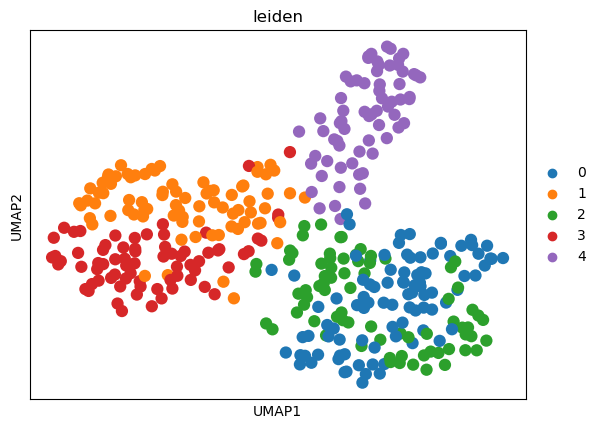

In [29]:
sc.pl.umap(adata, color='leiden')

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


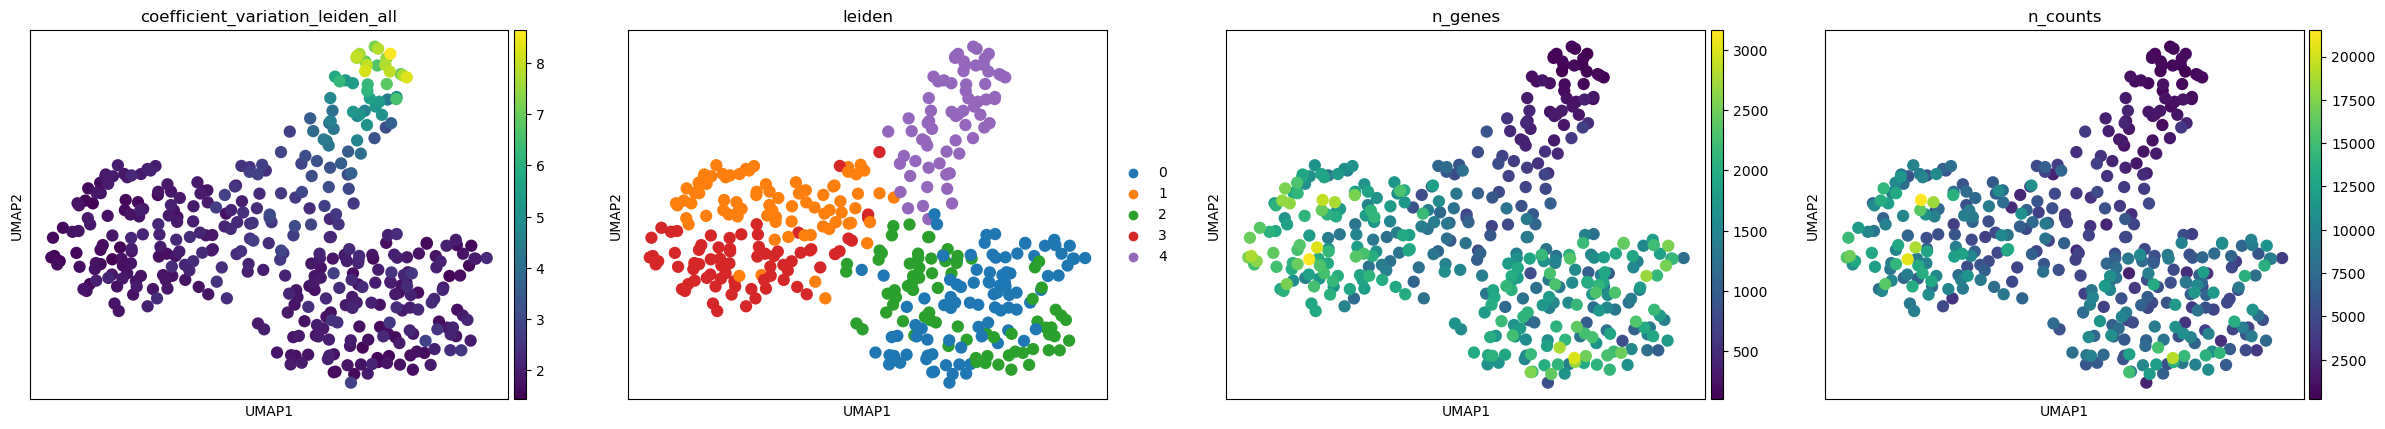

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanos

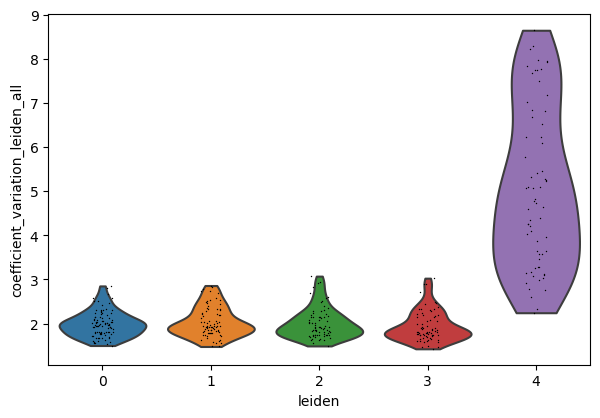

In [30]:
dict_cv = {}
cv = []
barcodes = []
for key in list(set(adata.obs['leiden'])):
    adata_tmp = adata[adata.obs['leiden']==key,:].copy()
    #dict_cv[key] = variation(adata_tmp.X.transpose())
    cv += variation(adata_tmp.X.transpose()).tolist()
    barcodes+=adata_tmp.obs_names.tolist()
    
cv = pd.DataFrame(cv, columns=["coefficient_variation_leiden_all"], index=barcodes)
if "coefficient_variation_leiden_all" in adata.obs.columns:
    del adata.obs["coefficient_variation_leiden_all"]
adata.obs = adata.obs.join(cv)

sc.pl.umap(adata, color=['coefficient_variation_leiden_all', 'leiden', 'n_genes', 'n_counts'])
sc.pl.violin(adata, keys='coefficient_variation_leiden_all', groupby='leiden')

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

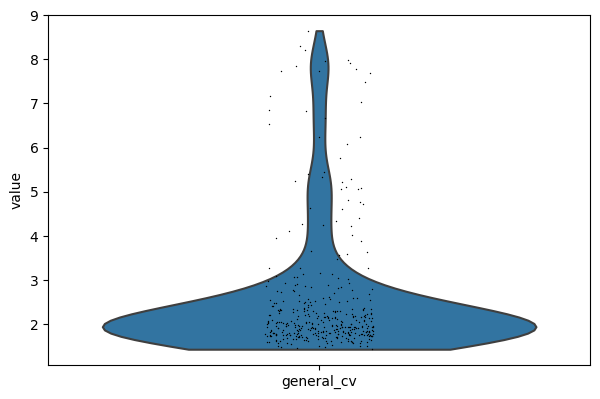

In [31]:
## Get the coefficient of variation for all the cells
cv = variation(adata.X.transpose()).tolist()
adata.obs['general_cv'] = cv
cv_all_genes = cv
sc.pl.violin(adata, keys='general_cv')

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

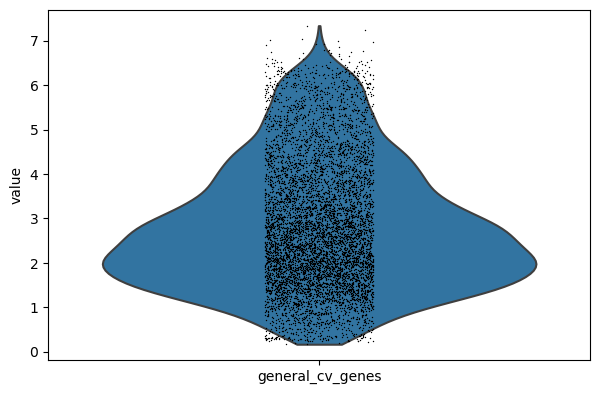

In [32]:
## Get the coefficient of variation for all the cells
cv = variation(adata.X).tolist()
adata.var['general_cv_genes'] = cv
sc.pl.violin(adata.transpose(), keys='general_cv_genes')

## Get the coefficient of variation per group of genes

In [33]:
adata.var = adata.var.join(df)
adata.var

n_cells         gene_type  n_cells_by_counts  \
Tb427_000007500:pseudogene       10  Trypanosoma gene                 10   
Tb427_000008000:pseudogene       12  Trypanosoma gene                 12   
Tb427_000008600:pseudogene       13  Trypanosoma gene                 13   
Tb427_000010800                  20  Trypanosoma gene                 20   
Tb427_000011100:pseudogene       58  Trypanosoma gene                 58   
...                             ...               ...                ...   
Tb427_110189800                  56  Trypanosoma gene                 56   
Tb427_110189900                 278  Trypanosoma gene                278   
Tb427_110190000                 228  Trypanosoma gene                228   
Tb427_110190100                 132  Trypanosoma gene                132   
Tb427_110190200                  41  Trypanosoma gene                 41   

                            mean_counts  pct_dropout_by_counts  total_counts  \
Tb427_000007500:pseudogene     0.028646              97.395833          11.0   
Tb427_000008000:pseudogene     0.169271              96.875000          65.0   
Tb427_000008600:pseudogene     0.104167              96.614583          40.0   
Tb427_000010800                0.091146              94.791667          35.0   
Tb427_000011100:pseudogene     0.289062              84.895833         111.0   
...                                 ...                    ...           ...   
Tb427_110189800                0.197917              85.416667          76.0   
Tb427_110189900                2.635417              27.604167        1012.0   
Tb427_110190000                1.359375              40.625000         522.0   
Tb427_110190100                0.559896              65.625000         215.0   
Tb427_110190200                0.153646              89.322917          59.0   

                            general_cv_genes        kon       ron      koff  \
Tb427_000007500:pseudogene          6.453267        NaN       NaN       NaN   
Tb427_000008000:pseudogene          6.773634        NaN       NaN       NaN   
Tb427_000008600:pseudogene          6.277245        NaN       NaN       NaN   
Tb427_000010800                     4.595645  10.553674  0.407452  1.174977   
Tb427_000011100:pseudogene          2.622079        NaN       NaN       NaN   
...                                      ...        ...       ...       ...   
Tb427_110189800                     2.604238   2.176259  0.383614  1.449617   
Tb427_110189900                     0.704247   2.017370  0.755298  5.609538   
Tb427_110190000                     0.932826   1.983585  0.511785  4.565361   
Tb427_110190100                     1.503769   3.076035  0.831479  4.051376   
Tb427_110190200                     3.016101   1.023993  0.108253  2.724770   

                            ...  Length   Synthesis  Half-life  \
Tb427_000007500:pseudogene  ...     NaN         NaN        NaN   
Tb427_000008000:pseudogene  ...     NaN         NaN        NaN   
Tb427_000008600:pseudogene  ...     NaN         NaN        NaN   
Tb427_000010800             ...     NaN         NaN        NaN   
Tb427_000011100:pseudogene  ...     NaN         NaN        NaN   
...                         ...     ...         ...        ...   
Tb427_110189800             ...  2493.0  198.107243  10.388323   
Tb427_110189900             ...  4131.0  396.847676  43.000158   
Tb427_110190000             ...  1137.0  140.898850  13.380461   
Tb427_110190100             ...     NaN         NaN        NaN   
Tb427_110190200             ...  2607.0  156.846552   9.792476   

                            Half-life_median_group  Synthesis_median_group  \
Tb427_000007500:pseudogene                     NaN                     NaN   
Tb427_000008000:pseudogene                     NaN                     NaN   
Tb427_000008600:pseudogene                     NaN                     NaN   
Tb427_000010800                                NaN                     NaN   
Tb427_000011100:pseudo

In [34]:
pd.crosstab(adata.var['group_per_median'], adata.var['group_per_median'])

group_per_median  group 1  group 2  group 3  group 4
group_per_median                                    
group 1              1831        0        0        0
group 2                 0     1310        0        0
group 3                 0        0     1346        0
group 4                 0        0        0     1689

In [35]:
dict_cv_per_gene_group = {}
cv = []
barcodes = []
for key in list(set(adata.var['group_per_median'])):
    adata_tmp = adata[:, adata.var['group_per_median']==key].copy()
    dict_cv_per_gene_group[key] = variation(adata_tmp.X.transpose())
    
dict_cv_per_gene_group['all_genes'] = cv_all_genes

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [36]:
for element in dict_cv_per_gene_group.keys():
    print(element, len(dict_cv_per_gene_group[element]))

nan 384
group 4 384
group 2 384
group 1 384
group 3 384
all_genes 384


In [37]:
df_cv = pd.DataFrame(dict_cv_per_gene_group)
del df_cv[np.nan]
df_cv

group 4   group 2   group 1   group 3  all_genes
0    2.083804  1.547131  1.367974  1.918079   1.747789
1    5.273269  2.518264  2.223270  4.296323   3.075376
2    1.858556  1.440298  1.241312  1.681378   1.595101
3    2.235770  1.593982  1.401190  1.997710   1.810190
4    1.972563  1.546974  1.343035  1.766546   1.710181
..        ...       ...       ...       ...        ...
379  1.870178  1.523811  1.446817  1.942033   1.732390
380  1.806862  1.386649  1.209165  1.695189   1.563283
381  2.202530  1.567659  1.445820  1.910843   1.801230
382  1.816282  1.451015  1.393181  1.828884   1.661504
383  2.204230  1.618433  1.448749  2.065605   1.850295

[384 rows x 5 columns]

In [38]:
df_cv = df_cv[['all_genes', 'group 1', 'group 2', 'group 3', 'group 4']]
df_cv

all_genes   group 1   group 2   group 3   group 4
0     1.747789  1.367974  1.547131  1.918079  2.083804
1     3.075376  2.223270  2.518264  4.296323  5.273269
2     1.595101  1.241312  1.440298  1.681378  1.858556
3     1.810190  1.401190  1.593982  1.997710  2.235770
4     1.710181  1.343035  1.546974  1.766546  1.972563
..         ...       ...       ...       ...       ...
379   1.732390  1.446817  1.523811  1.942033  1.870178
380   1.563283  1.209165  1.386649  1.695189  1.806862
381   1.801230  1.445820  1.567659  1.910843  2.202530
382   1.661504  1.393181  1.451015  1.828884  1.816282
383   1.850295  1.448749  1.618433  2.065605  2.204230

[384 rows x 5 columns]

In [39]:
df_cv.to_csv("coeff_variation_per_gene_groups.csv")

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

<Axes: title={'center': 'Cell to cell variability'}>

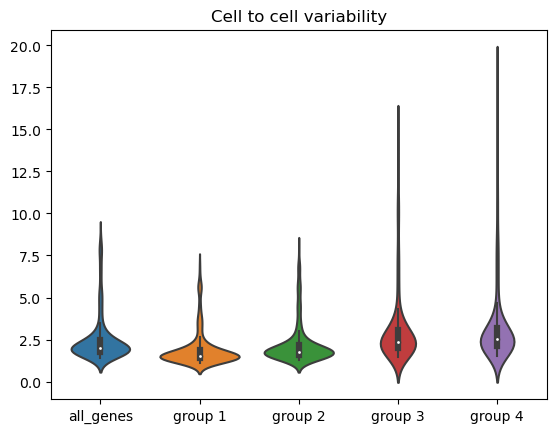

In [40]:
plt.title('Cell to cell variability')
sns.violinplot(df_cv)

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

<Axes: title={'center': 'Cell to cell variability'}>

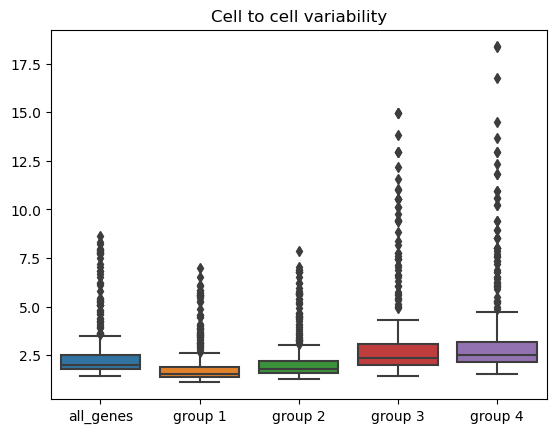

In [41]:
plt.title('Cell to cell variability')
sns.boxplot(df_cv)

In [ ]:
# we want to show the average expression of genes in group 1 to 4

#scatter plot with x= cell to cell var y=average expression of the gene and hue=group 

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanos

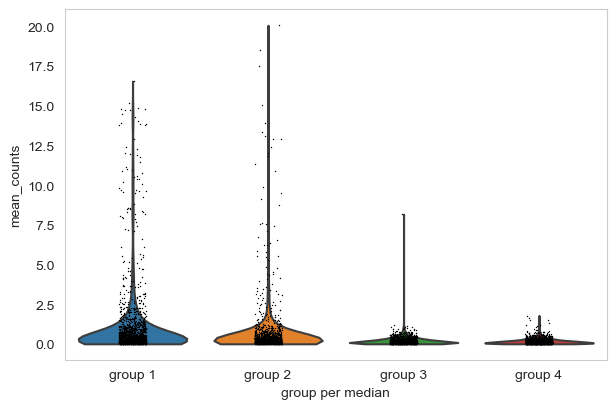

In [65]:
sc.pl.violin(adata.transpose(), keys='mean_counts', groupby="group_per_median")

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanos

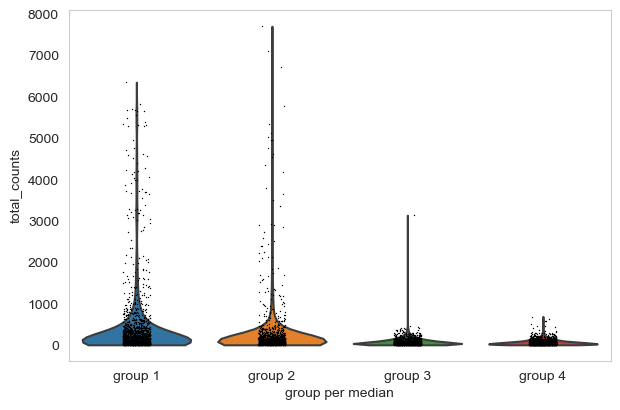

In [66]:
sc.pl.violin(adata.transpose(), keys='total_counts', groupby="group_per_median")

In [72]:
adata.var['total_counts_log'] = np.log10(adata.var['total_counts'] )

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


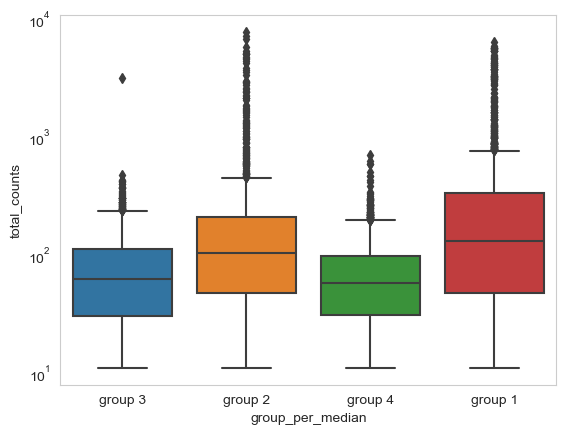

In [73]:
sns.boxplot(adata.var, y="total_counts", x='group_per_median')
plt.yscale('log')

In [75]:
adata.var?

# Plots

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


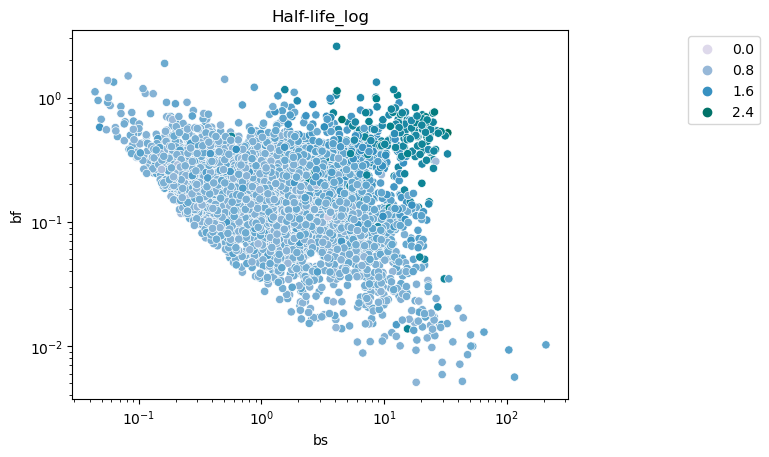

In [42]:
key = 'Half-life_log'

sns.scatterplot(df, x='bs', y='bf', hue=key, palette='PuBuGn')
plt.legend(loc='upper right',bbox_to_anchor=(0.9,0.5,0.5,0.5))
plt.title(key)
plt.xscale('log')
plt.yscale('log')
plt.savefig(fname='log_BF_BS_'+key+'.pdf',dpi=800, format='pdf', bbox_inches='tight')

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


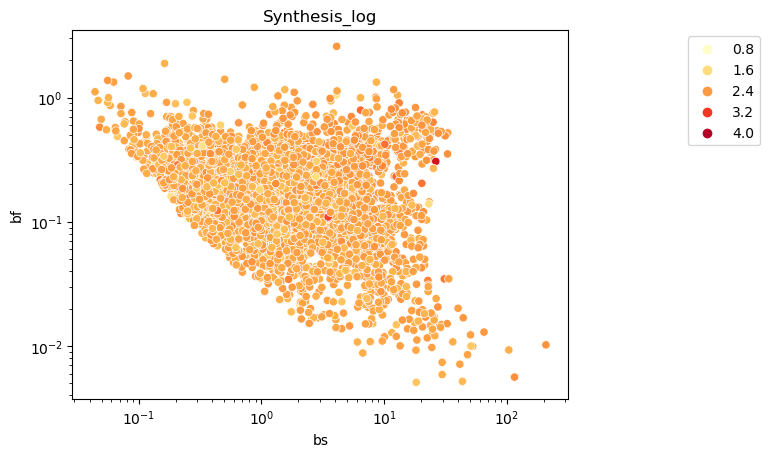

In [43]:
key = 'Synthesis_log'

sns.scatterplot(df, x='bs', y='bf', hue=key, palette='YlOrRd')
plt.legend(loc='upper right',bbox_to_anchor=(0.9,0.5,0.5,0.5))
plt.title(key)
plt.xscale('log')
plt.yscale('log')
key = '_'.join(key.split('/'))
plt.savefig(fname='log_BF_BS_'+key+'.pdf',dpi=800, format='pdf', bbox_inches='tight')

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


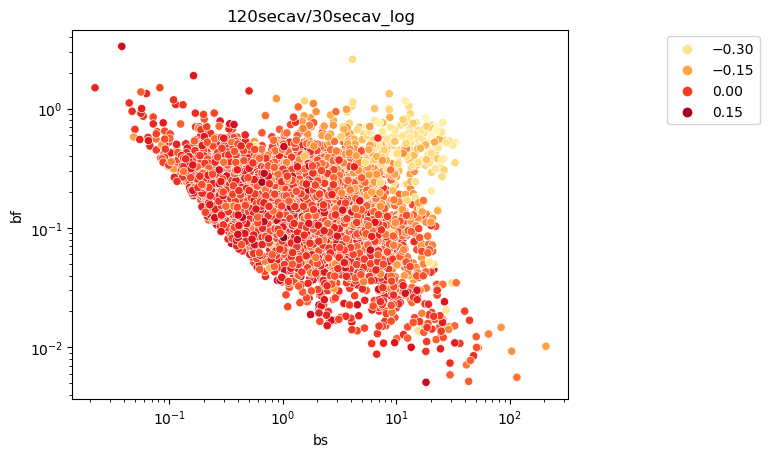

In [44]:
key = '120secav/30secav_log'

sns.scatterplot(df, x='bs', y='bf', hue=key, palette='YlOrRd')
plt.legend(loc='upper right',bbox_to_anchor=(0.9,0.5,0.5,0.5))
plt.title(key)
plt.xscale('log')
plt.yscale('log')
key = '_'.join(key.split('/'))
plt.savefig(fname='log_BF_BS_'+key+'.pdf',dpi=800, format='pdf', bbox_inches='tight')

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


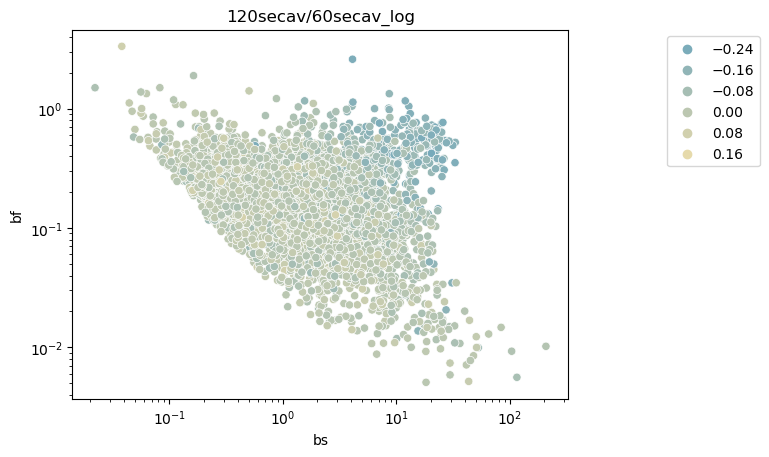

In [45]:
key = '120secav/60secav_log'

sns.scatterplot(df, x='bs', y='bf', hue=key, palette="blend:#7AB,#EDA")
plt.legend(loc='upper right',bbox_to_anchor=(0.9,0.5,0.5,0.5))
plt.title(key)
plt.xscale('log')
plt.yscale('log')
key = '_'.join(key.split('/'))
plt.savefig(fname='log_BF_BS_'+key,dpi=800, format='pdf', bbox_inches='tight')

# 3D plots

In [46]:
adata.var.columns

Index(['n_cells', 'gene_type', 'n_cells_by_counts', 'mean_counts',
       'pct_dropout_by_counts', 'total_counts', 'general_cv_genes', 'kon',
       'ron', 'koff', 'roff', 'mu', 'delta', 'dist', 'tau_off', 'tau_on', 'bf',
       'bs', 'log_kon', 'log_koff', 'log_bs', 'log_bf', 'density_kernel', '1',
       '2', '5', 'transcript_name', 'PTU', 'start_PTU', 'end_PTU',
       'PTU_strand', 'chromosome', 'start', 'end', 'strand', 'all_gene_info',
       'length_gene', 'ERCC', 'input.input_bams.NS694_IP_TT201.sorted.bam',
       'input.input_bams.NS695_IP_TT202.sorted.bam', '0secRPKMave',
       'input.input_bams.NS696_IP_TT2301.sorted.bam',
       'input.input_bams.NS697_IP_TT2302.sorted.bam', '30secRPKMave',
       'input.input_bams.NS698_IP_TT2601.sorted.bam',
       'input.input_bams.NS699_IP_TT2602.sorted.bam', '60secRPKMave',
       'input.input_bams.NS700_IP_TT21201.sorted.bam',
       'input.input_bams.NS701_IP_TT21202.sorted.bam', '120secRPKMave',
       '120secav/30secav', '120seca

In [47]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})


import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

ValueError: 'c' argument has 6176 elements, which is inconsistent with 'x' and 'y' with size 6171.

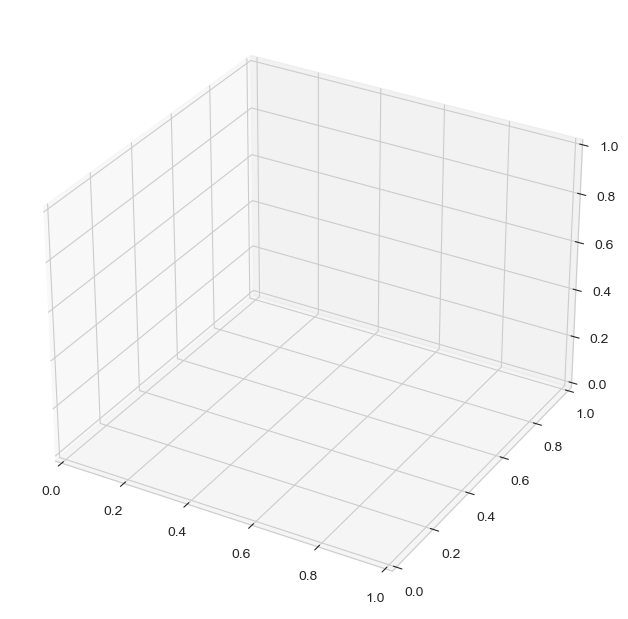

In [48]:
x = adata.var['120secav/60secav_log']
y = adata.var['Half-life_log']
z = adata.var['general_cv_genes']

cmap = sns.color_palette(palette='Set3', n_colors=len(set(adata.var['group_per_median'])))
group_colors = []
for key in adata.var['group_per_median']:
    if key == 'group 1':
        group_colors.append(cmap[0])
    elif key == 'group 2':
        group_colors.append(cmap[1])
    elif key == 'group 3':
        group_colors.append(cmap[2])
    elif key == 'group 4':
        group_colors.append(cmap[3])
group_colors = np.array(group_colors)

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = 'Set3'

# plot
sc = ax.scatter(x, y, z, s=40, c=group_colors, marker='o', alpha=1)
ax.set_xlabel('120secav/60secav')
ax.set_ylabel('Half-life')
ax.set_zlabel('general_cv_genes')


# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


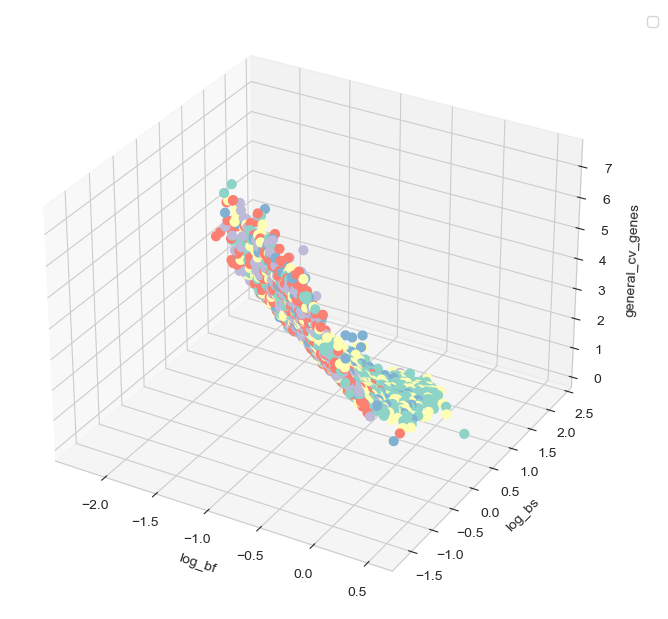

In [49]:
x = adata.var['log_bf']
y = adata.var['log_bs']
z = adata.var['general_cv_genes']

cmap = sns.color_palette(palette='Set3', n_colors=len(set(adata.var['group_per_median'])))
group_colors = []
for key in adata.var['group_per_median']:
    if key == 'group 1':
        group_colors.append(cmap[0])
    elif key == 'group 2':
        group_colors.append(cmap[1])
    elif key == 'group 3':
        group_colors.append(cmap[2])
    elif key == 'group 4':
        group_colors.append(cmap[3])
    else:
        group_colors.append(cmap[4])
group_colors = np.array(group_colors)


# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = 'Set3'

# plot
sc = ax.scatter(x, y, z, s=40, c=group_colors, marker='o', alpha=1)
ax.set_xlabel('log_bf')
ax.set_ylabel('log_bs')
ax.set_zlabel('general_cv_genes')


# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

<Axes: xlabel='general_cv_genes', ylabel='log_bf'>

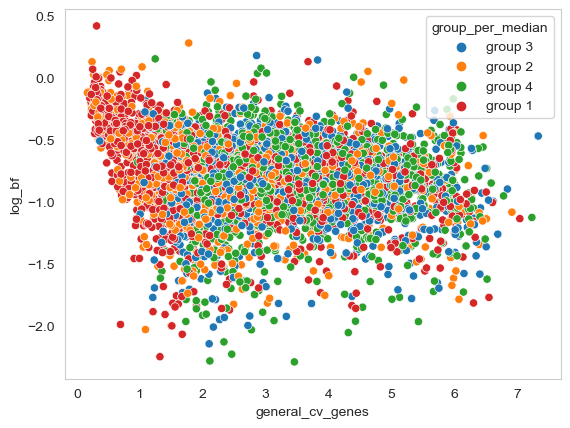

In [50]:
sns.scatterplot(adata.var, x='general_cv_genes', y='log_bf', hue='group_per_median')

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

<Axes: xlabel='general_cv_genes', ylabel='log_bs'>

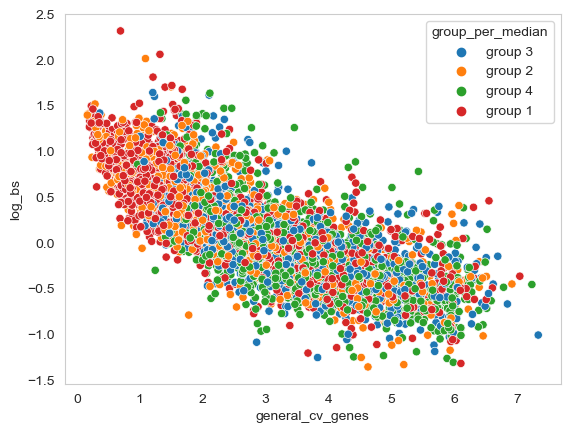

In [51]:
sns.scatterplot(adata.var, x='general_cv_genes', y='log_bs', hue='group_per_median')

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

<Axes: xlabel='general_cv_genes', ylabel='log_bs'>

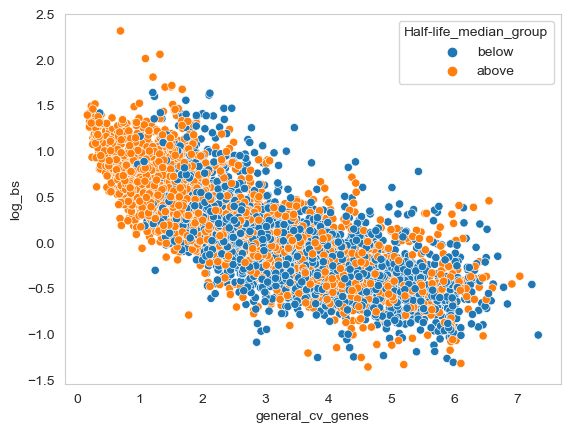

In [52]:
sns.scatterplot(adata.var, x='general_cv_genes', y='log_bs', hue='Half-life_median_group')

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

<Axes: xlabel='general_cv_genes', ylabel='log_bs'>

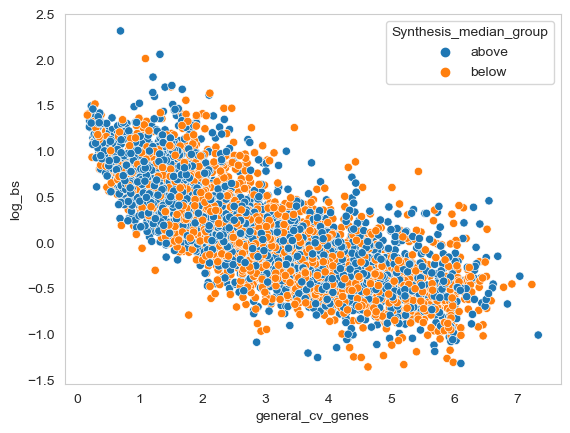

In [53]:
sns.scatterplot(adata.var, x='general_cv_genes', y='log_bs', hue='Synthesis_median_group')

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

<Axes: xlabel='general_cv_genes', ylabel='total_counts'>

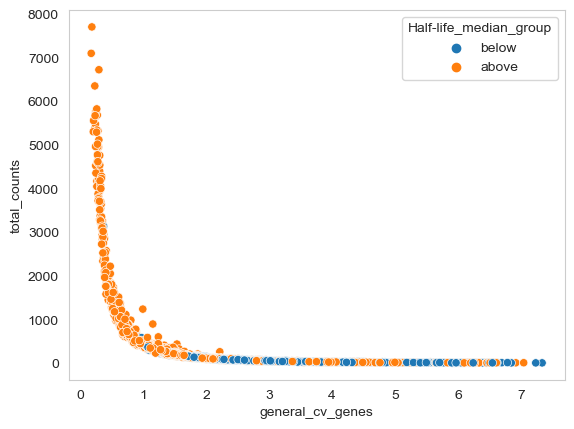

In [54]:
sns.scatterplot(adata.var, x='general_cv_genes', y='total_counts', hue='Half-life_median_group')

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

<Axes: xlabel='general_cv_genes', ylabel='total_counts'>

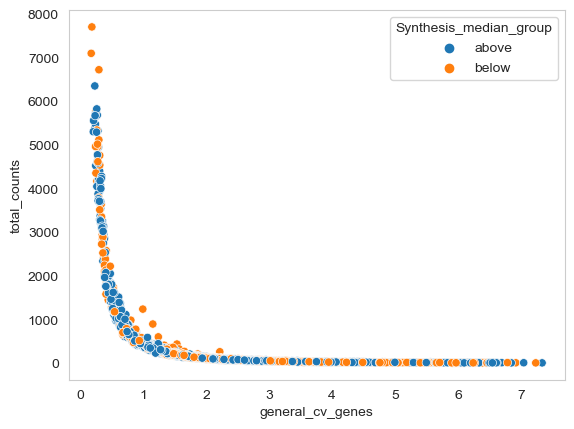

In [55]:
sns.scatterplot(adata.var, x='general_cv_genes', y='total_counts', hue='Synthesis_median_group')

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

<Axes: xlabel='Half-life_log', ylabel='total_counts'>

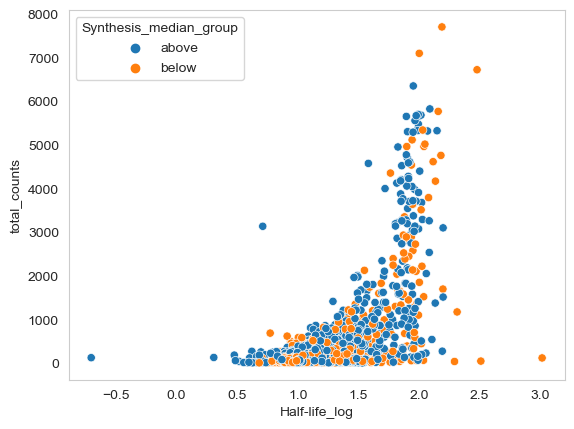

In [56]:
sns.scatterplot(adata.var, x='Half-life_log', y='total_counts', hue='Synthesis_median_group')

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Half-life_log', ylabel='total_counts'>

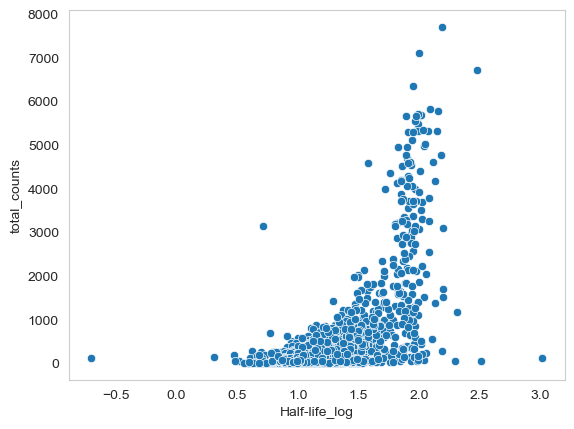

In [57]:
sns.scatterplot(adata.var, x='Half-life_log', y='total_counts')

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

<Axes: xlabel='Half-life_log', ylabel='total_counts'>

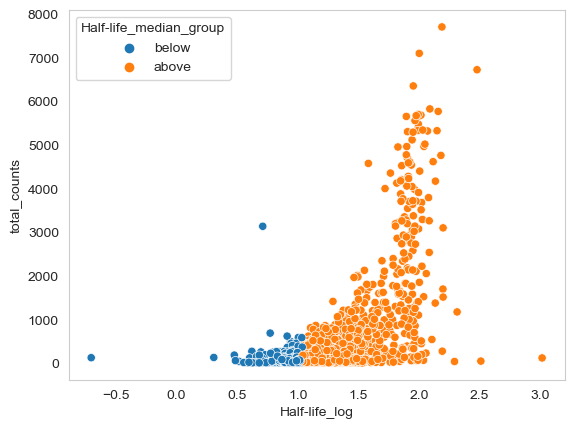

In [58]:
sns.scatterplot(adata.var, x='Half-life_log', y='total_counts', hue='Half-life_median_group')

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

<Axes: xlabel='Synthesis_log', ylabel='total_counts'>

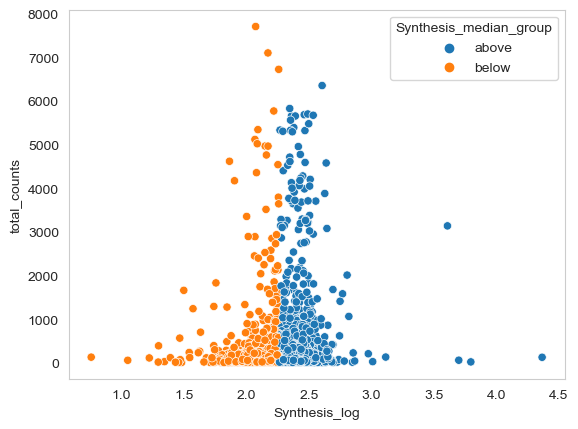

In [59]:
sns.scatterplot(adata.var, x='Synthesis_log', y='total_counts', hue='Synthesis_median_group')

In [60]:
adata.var

n_cells         gene_type  n_cells_by_counts  \
Tb427_000007500:pseudogene       10  Trypanosoma gene                 10   
Tb427_000008000:pseudogene       12  Trypanosoma gene                 12   
Tb427_000008600:pseudogene       13  Trypanosoma gene                 13   
Tb427_000010800                  20  Trypanosoma gene                 20   
Tb427_000011100:pseudogene       58  Trypanosoma gene                 58   
...                             ...               ...                ...   
Tb427_110189800                  56  Trypanosoma gene                 56   
Tb427_110189900                 278  Trypanosoma gene                278   
Tb427_110190000                 228  Trypanosoma gene                228   
Tb427_110190100                 132  Trypanosoma gene                132   
Tb427_110190200                  41  Trypanosoma gene                 41   

                            mean_counts  pct_dropout_by_counts  total_counts  \
Tb427_000007500:pseudogene     0.028646              97.395833          11.0   
Tb427_000008000:pseudogene     0.169271              96.875000          65.0   
Tb427_000008600:pseudogene     0.104167              96.614583          40.0   
Tb427_000010800                0.091146              94.791667          35.0   
Tb427_000011100:pseudogene     0.289062              84.895833         111.0   
...                                 ...                    ...           ...   
Tb427_110189800                0.197917              85.416667          76.0   
Tb427_110189900                2.635417              27.604167        1012.0   
Tb427_110190000                1.359375              40.625000         522.0   
Tb427_110190100                0.559896              65.625000         215.0   
Tb427_110190200                0.153646              89.322917          59.0   

                            general_cv_genes        kon       ron      koff  \
Tb427_000007500:pseudogene          6.453267        NaN       NaN       NaN   
Tb427_000008000:pseudogene          6.773634        NaN       NaN       NaN   
Tb427_000008600:pseudogene          6.277245        NaN       NaN       NaN   
Tb427_000010800                     4.595645  10.553674  0.407452  1.174977   
Tb427_000011100:pseudogene          2.622079        NaN       NaN       NaN   
...                                      ...        ...       ...       ...   
Tb427_110189800                     2.604238   2.176259  0.383614  1.449617   
Tb427_110189900                     0.704247   2.017370  0.755298  5.609538   
Tb427_110190000                     0.932826   1.983585  0.511785  4.565361   
Tb427_110190100                     1.503769   3.076035  0.831479  4.051376   
Tb427_110190200                     3.016101   1.023993  0.108253  2.724770   

                            ...  Length   Synthesis  Half-life  \
Tb427_000007500:pseudogene  ...     NaN         NaN        NaN   
Tb427_000008000:pseudogene  ...     NaN         NaN        NaN   
Tb427_000008600:pseudogene  ...     NaN         NaN        NaN   
Tb427_000010800             ...     NaN         NaN        NaN   
Tb427_000011100:pseudogene  ...     NaN         NaN        NaN   
...                         ...     ...         ...        ...   
Tb427_110189800             ...  2493.0  198.107243  10.388323   
Tb427_110189900             ...  4131.0  396.847676  43.000158   
Tb427_110190000             ...  1137.0  140.898850  13.380461   
Tb427_110190100             ...     NaN         NaN        NaN   
Tb427_110190200             ...  2607.0  156.846552   9.792476   

                            Half-life_median_group  Synthesis_median_group  \
Tb427_000007500:pseudogene                     NaN                     NaN   
Tb427_000008000:pseudogene                     NaN                     NaN   
Tb427_000008600:pseudogene                     NaN                     NaN   
Tb427_000010800                                NaN                     NaN   
Tb427_000011100:pseudo

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

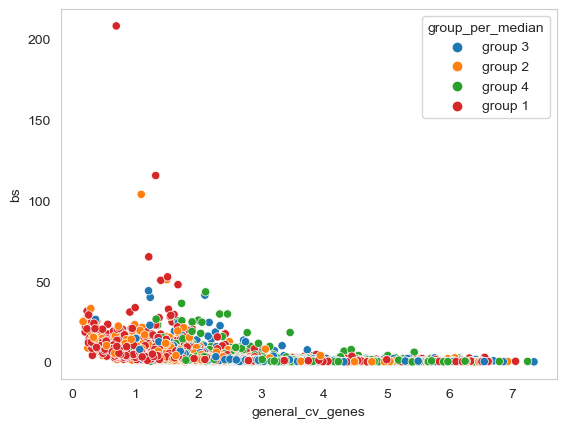

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

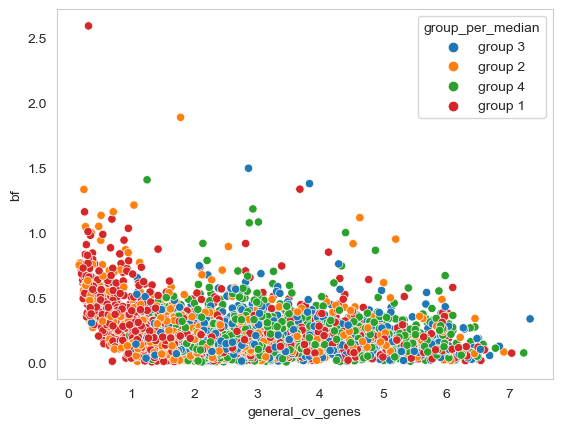

In [61]:
sns.scatterplot(adata.var, x='general_cv_genes', y='bs', hue='group_per_median')
plt.show()
sns.scatterplot(adata.var, x='general_cv_genes', y='bf', hue='group_per_median')
plt.show()

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

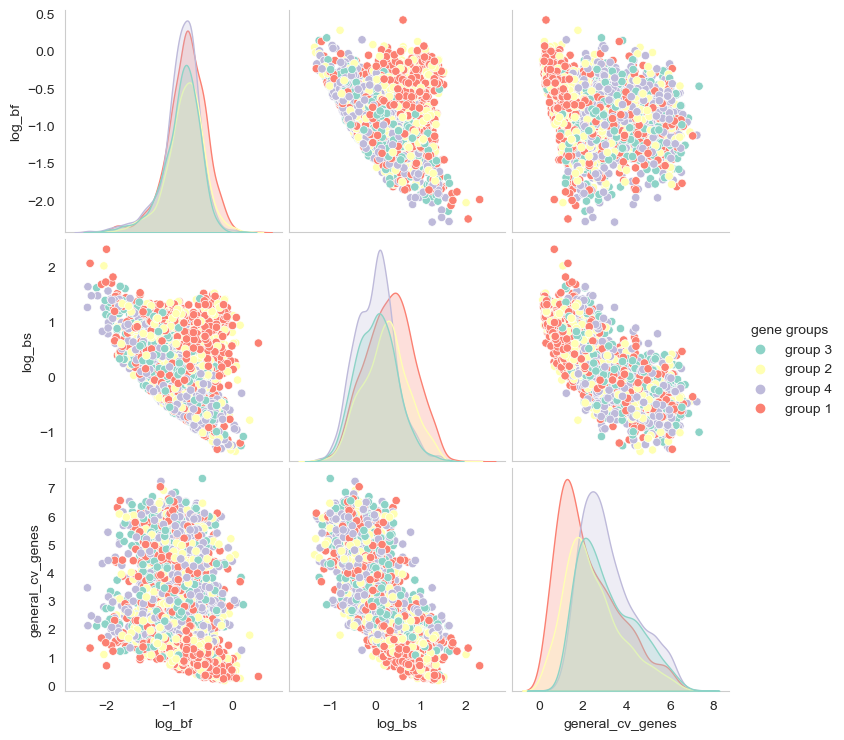

In [76]:
#Seaborn pair plot
df_3d = pd.DataFrame()
df_3d['log_bf'] = adata.var['log_bf']
df_3d['log_bs'] = adata.var['log_bs']
df_3d['general_cv_genes'] = adata.var['general_cv_genes']
df_3d['gene groups'] = adata.var['group_per_median']

sns.pairplot(df_3d, hue='gene groups', palette='Set3')

In [77]:
adata.var

n_cells         gene_type  n_cells_by_counts  \
Tb427_000007500:pseudogene       10  Trypanosoma gene                 10   
Tb427_000008000:pseudogene       12  Trypanosoma gene                 12   
Tb427_000008600:pseudogene       13  Trypanosoma gene                 13   
Tb427_000010800                  20  Trypanosoma gene                 20   
Tb427_000011100:pseudogene       58  Trypanosoma gene                 58   
...                             ...               ...                ...   
Tb427_110189800                  56  Trypanosoma gene                 56   
Tb427_110189900                 278  Trypanosoma gene                278   
Tb427_110190000                 228  Trypanosoma gene                228   
Tb427_110190100                 132  Trypanosoma gene                132   
Tb427_110190200                  41  Trypanosoma gene                 41   

                            mean_counts  pct_dropout_by_counts  total_counts  \
Tb427_000007500:pseudogene     0.028646              97.395833          11.0   
Tb427_000008000:pseudogene     0.169271              96.875000          65.0   
Tb427_000008600:pseudogene     0.104167              96.614583          40.0   
Tb427_000010800                0.091146              94.791667          35.0   
Tb427_000011100:pseudogene     0.289062              84.895833         111.0   
...                                 ...                    ...           ...   
Tb427_110189800                0.197917              85.416667          76.0   
Tb427_110189900                2.635417              27.604167        1012.0   
Tb427_110190000                1.359375              40.625000         522.0   
Tb427_110190100                0.559896              65.625000         215.0   
Tb427_110190200                0.153646              89.322917          59.0   

                            general_cv_genes        kon       ron      koff  \
Tb427_000007500:pseudogene          6.453267        NaN       NaN       NaN   
Tb427_000008000:pseudogene          6.773634        NaN       NaN       NaN   
Tb427_000008600:pseudogene          6.277245        NaN       NaN       NaN   
Tb427_000010800                     4.595645  10.553674  0.407452  1.174977   
Tb427_000011100:pseudogene          2.622079        NaN       NaN       NaN   
...                                      ...        ...       ...       ...   
Tb427_110189800                     2.604238   2.176259  0.383614  1.449617   
Tb427_110189900                     0.704247   2.017370  0.755298  5.609538   
Tb427_110190000                     0.932826   1.983585  0.511785  4.565361   
Tb427_110190100                     1.503769   3.076035  0.831479  4.051376   
Tb427_110190200                     3.016101   1.023993  0.108253  2.724770   

                            ...   Synthesis  Half-life  \
Tb427_000007500:pseudogene  ...         NaN        NaN   
Tb427_000008000:pseudogene  ...         NaN        NaN   
Tb427_000008600:pseudogene  ...         NaN        NaN   
Tb427_000010800             ...         NaN        NaN   
Tb427_000011100:pseudogene  ...         NaN        NaN   
...                         ...         ...        ...   
Tb427_110189800             ...  198.107243  10.388323   
Tb427_110189900             ...  396.847676  43.000158   
Tb427_110190000             ...  140.898850  13.380461   
Tb427_110190100             ...         NaN        NaN   
Tb427_110190200             ...  156.846552   9.792476   

                            Half-life_median_group  Synthesis_median_group  \
Tb427_000007500:pseudogene                     NaN                     NaN   
Tb427_000008000:pseudogene                     NaN                     NaN   
Tb427_000008600:pseudogene                     NaN                     NaN   
Tb427_000010800                                NaN                     NaN   
Tb427_000011100:pseudogene                     NaN                     NaN   
...                                     

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

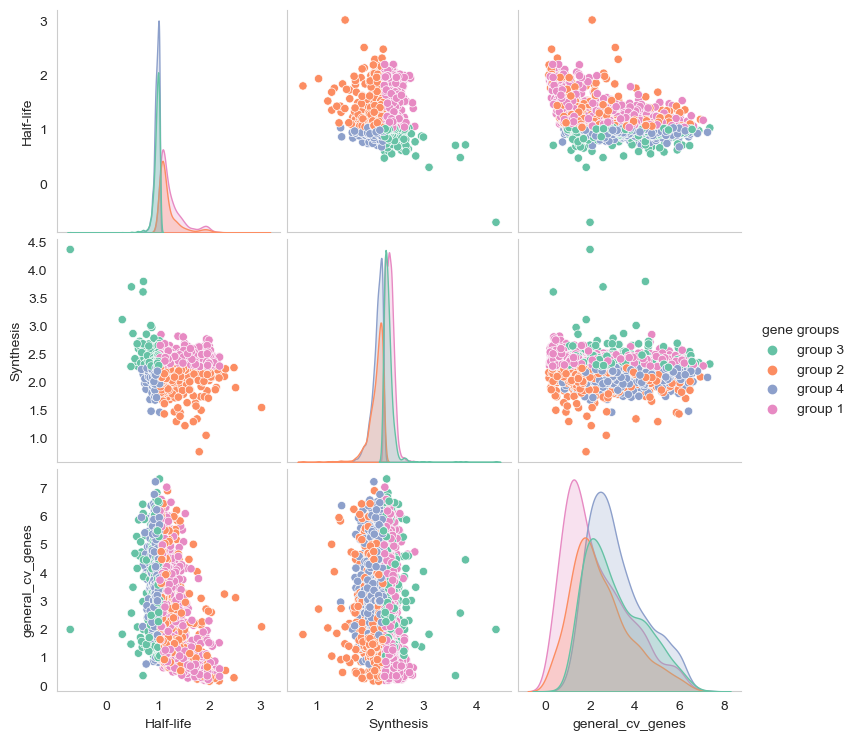

In [79]:
#Seaborn pair plot
df_3d = pd.DataFrame()
df_3d['Half-life'] = adata.var['Half-life_log']
df_3d['Synthesis'] = adata.var['Synthesis_log']
df_3d['general_cv_genes'] = adata.var['general_cv_genes']
df_3d['gene groups'] = adata.var['group_per_median']

sns.pairplot(df_3d, hue='gene groups', palette='Set2')

/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/anna.danese/miniconda3/envs/trypanosoma/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_d

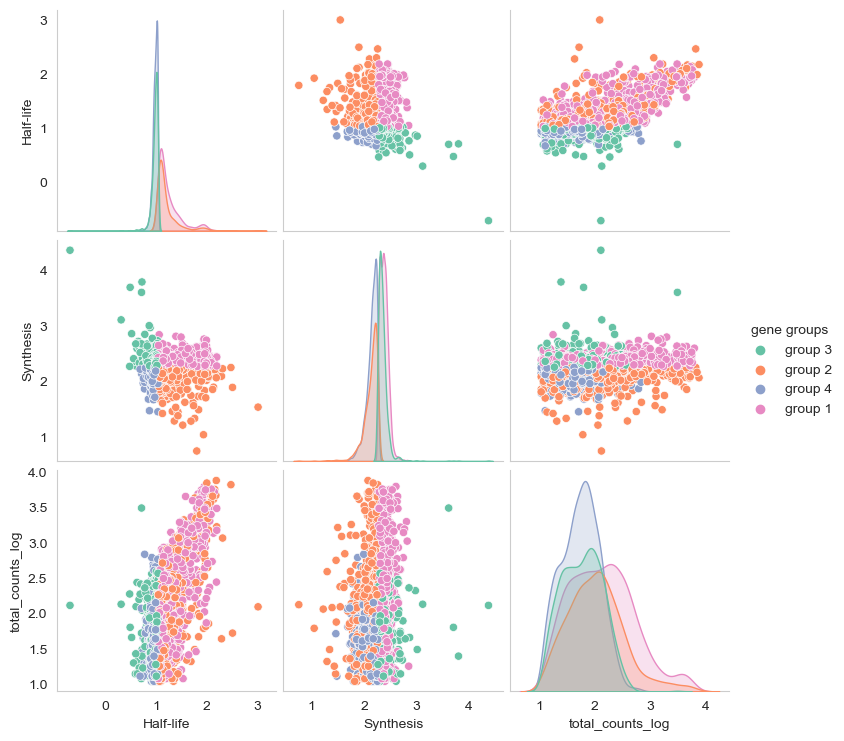

In [82]:
#Seaborn pair plot
df_3d = pd.DataFrame()
df_3d['Half-life'] = adata.var['Half-life_log']
df_3d['Synthesis'] = adata.var['Synthesis_log']
df_3d['total_counts_log'] = adata.var['total_counts_log']
df_3d['gene groups'] = adata.var['group_per_median']

sns.pairplot(df_3d, hue='gene groups', palette='Set2')

In [81]:
adata.var

n_cells         gene_type  n_cells_by_counts  \
Tb427_000007500:pseudogene       10  Trypanosoma gene                 10   
Tb427_000008000:pseudogene       12  Trypanosoma gene                 12   
Tb427_000008600:pseudogene       13  Trypanosoma gene                 13   
Tb427_000010800                  20  Trypanosoma gene                 20   
Tb427_000011100:pseudogene       58  Trypanosoma gene                 58   
...                             ...               ...                ...   
Tb427_110189800                  56  Trypanosoma gene                 56   
Tb427_110189900                 278  Trypanosoma gene                278   
Tb427_110190000                 228  Trypanosoma gene                228   
Tb427_110190100                 132  Trypanosoma gene                132   
Tb427_110190200                  41  Trypanosoma gene                 41   

                            mean_counts  pct_dropout_by_counts  total_counts  \
Tb427_000007500:pseudogene     0.028646              97.395833          11.0   
Tb427_000008000:pseudogene     0.169271              96.875000          65.0   
Tb427_000008600:pseudogene     0.104167              96.614583          40.0   
Tb427_000010800                0.091146              94.791667          35.0   
Tb427_000011100:pseudogene     0.289062              84.895833         111.0   
...                                 ...                    ...           ...   
Tb427_110189800                0.197917              85.416667          76.0   
Tb427_110189900                2.635417              27.604167        1012.0   
Tb427_110190000                1.359375              40.625000         522.0   
Tb427_110190100                0.559896              65.625000         215.0   
Tb427_110190200                0.153646              89.322917          59.0   

                            general_cv_genes        kon       ron      koff  \
Tb427_000007500:pseudogene          6.453267        NaN       NaN       NaN   
Tb427_000008000:pseudogene          6.773634        NaN       NaN       NaN   
Tb427_000008600:pseudogene          6.277245        NaN       NaN       NaN   
Tb427_000010800                     4.595645  10.553674  0.407452  1.174977   
Tb427_000011100:pseudogene          2.622079        NaN       NaN       NaN   
...                                      ...        ...       ...       ...   
Tb427_110189800                     2.604238   2.176259  0.383614  1.449617   
Tb427_110189900                     0.704247   2.017370  0.755298  5.609538   
Tb427_110190000                     0.932826   1.983585  0.511785  4.565361   
Tb427_110190100                     1.503769   3.076035  0.831479  4.051376   
Tb427_110190200                     3.016101   1.023993  0.108253  2.724770   

                            ...   Synthesis  Half-life  \
Tb427_000007500:pseudogene  ...         NaN        NaN   
Tb427_000008000:pseudogene  ...         NaN        NaN   
Tb427_000008600:pseudogene  ...         NaN        NaN   
Tb427_000010800             ...         NaN        NaN   
Tb427_000011100:pseudogene  ...         NaN        NaN   
...                         ...         ...        ...   
Tb427_110189800             ...  198.107243  10.388323   
Tb427_110189900             ...  396.847676  43.000158   
Tb427_110190000             ...  140.898850  13.380461   
Tb427_110190100             ...         NaN        NaN   
Tb427_110190200             ...  156.846552   9.792476   

                            Half-life_median_group  Synthesis_median_group  \
Tb427_000007500:pseudogene                     NaN                     NaN   
Tb427_000008000:pseudogene                     NaN                     NaN   
Tb427_000008600:pseudogene                     NaN                     NaN   
Tb427_000010800                                NaN                     NaN   
Tb427_000011100:pseudogene                     NaN                     NaN   
...                                     